In [1]:
import sys
import os 
src_dir = os.path.join(os.getcwd(), '..', 'src')
sys.path.append(src_dir)

In [2]:
import torch
import torchvision.transforms as transforms
import numpy as np
import seaborn as sns
import pandas as pd
import torchattacks as ta
import matplotlib.pyplot as plt

from models import mnist, cifar
from data_attacks import alg1, alg2, alg3, attackAny, nothing
from load_data import load_mnist, load_mnist_inv, load_cifar
from utils import test_attack, att
from utils import vis_attack as vis
from utils import saveAttackResults as testSave
from utils import analyse

In [3]:
net1 = mnist.MNIST1()
net1.load_state_dict(torch.load('../models/mnist-net1.pt'))
net1.eval()

net2 = mnist.MNIST2()
net2.load_state_dict(torch.load('../models/mnist-net2.pt'))
net2.eval()

net3 = mnist.MNIST3()
net3.load_state_dict(torch.load('../models/mnist-net3.pt'))
net3.eval()

net4 = mnist.MNIST4()
net4.load_state_dict(torch.load('../models/mnist-net4.pt'))
net4.eval()

netInv1 = mnist.MNIST1()
netInv1.load_state_dict(torch.load('../models/mnistInv-net1.pt'))
netInv1.eval()

netInv2 = mnist.MNIST2()
netInv2.load_state_dict(torch.load('../models/mnistInv-net2.pt'))
netInv2.eval()

netInv3 = mnist.MNIST3()
netInv3.load_state_dict(torch.load('../models/mnistInv-net3.pt'))
netInv3.eval()

netInv4 = mnist.MNIST4()
netInv4.load_state_dict(torch.load('../models/mnistInv-net4.pt'))
netInv4.eval()

netCif1 = cifar.CIFAR1()
netCif1.load_state_dict(torch.load('../models/cifar-net1.pt'))
netCif1.eval()

netCif2 = cifar.CIFAR2()
netCif2.load_state_dict(torch.load('../models/cifar-net2.pt'))
netCif2.eval();

In [4]:
id = 60
net = net2
img = load_mnist.testSetCorrect(net,id+1)[id][0]
im = img[0,0,:,:]

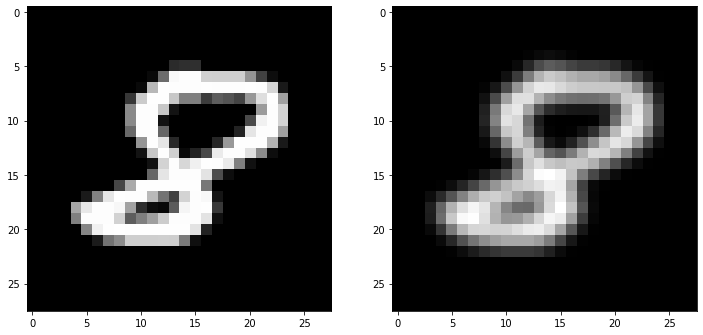

In [37]:
blurrer = transforms.GaussianBlur(kernel_size=3,sigma=1)
blurred = blurrer(img)[0,0,:,:]

figure = plt.figure(figsize=(12,6))
ax = figure.add_subplot(1, 2, 1)
plt.imshow(im, cmap='gray')
ax = figure.add_subplot(1, 2, 2)
plt.imshow(blurred, cmap='gray')
plt.show()

In [9]:
net = net2
n = 10
alg = alg3.Al1(type=2)
data = load_mnist.testSetCorrect(net,n)

testSave.specific(net,data,alg,'alg4Specific10Net1')

/home/s2229207/Documents/Study/PhD project/code/Extend attacks/.venv/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [4]:
net = net2
n = 10
alg = alg3.Al1(type=3)
data = load_mnist.testSetCorrect(net,n)

testSave.specific(net,data,alg,'alg5Specific10Net1Analytic')

In [4]:
net = net2
n = 10
alg = alg3.Al1(type=3, tolerance=2)
data = load_mnist.testSetCorrect(net,n)

testSave.specific(net,data,alg,'alg6Specific10Net1Analytic')

In [5]:
net = net2
n = 10
alg = alg3.Al1(type=2,tolerance=2)
data = load_mnist.testSetCorrect(net,n)

testSave.specific(net,data,alg,'alg7Specific10Net1Analytic')

/home/s2229207/Documents/Study/PhD project/code/Extend attacks/.venv/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


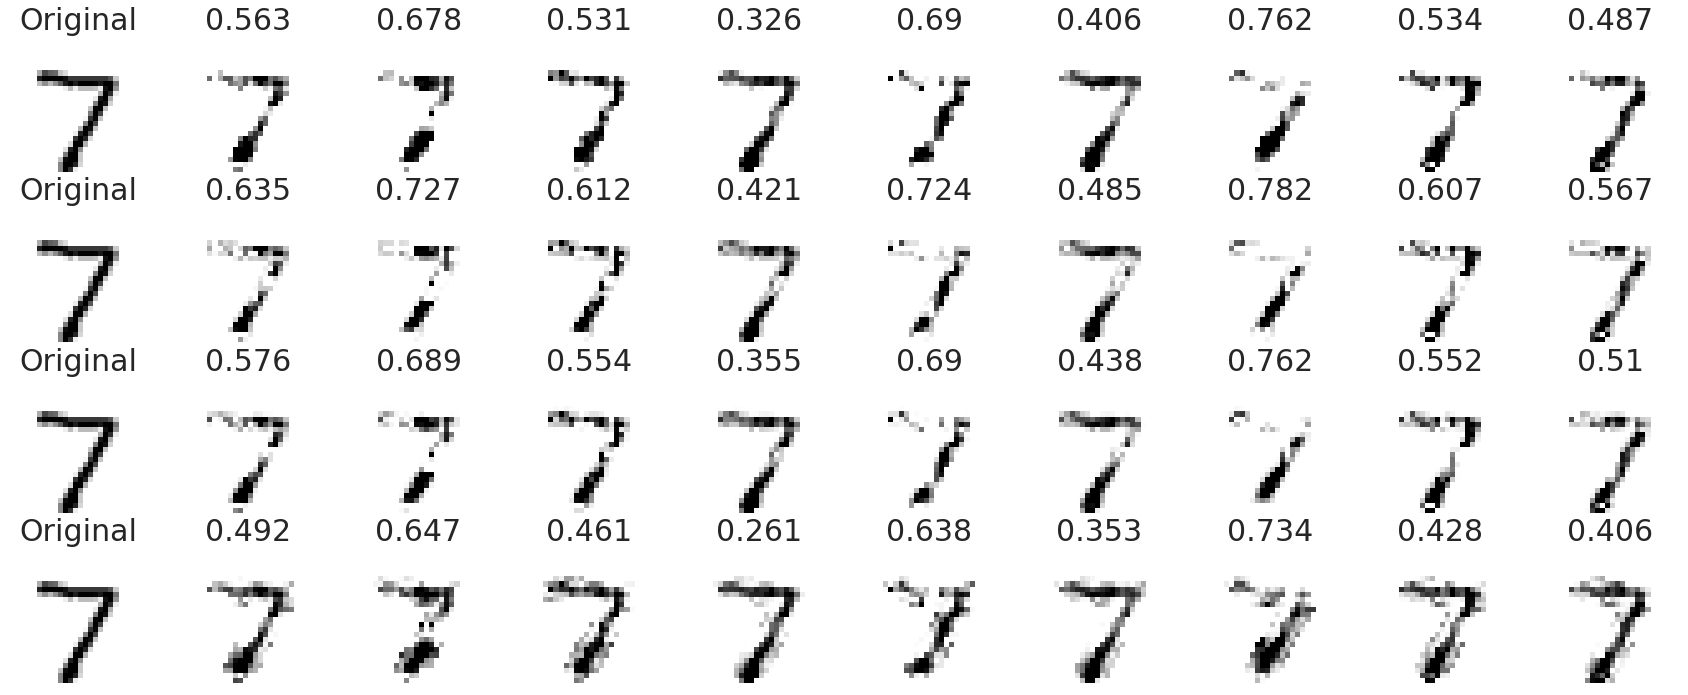

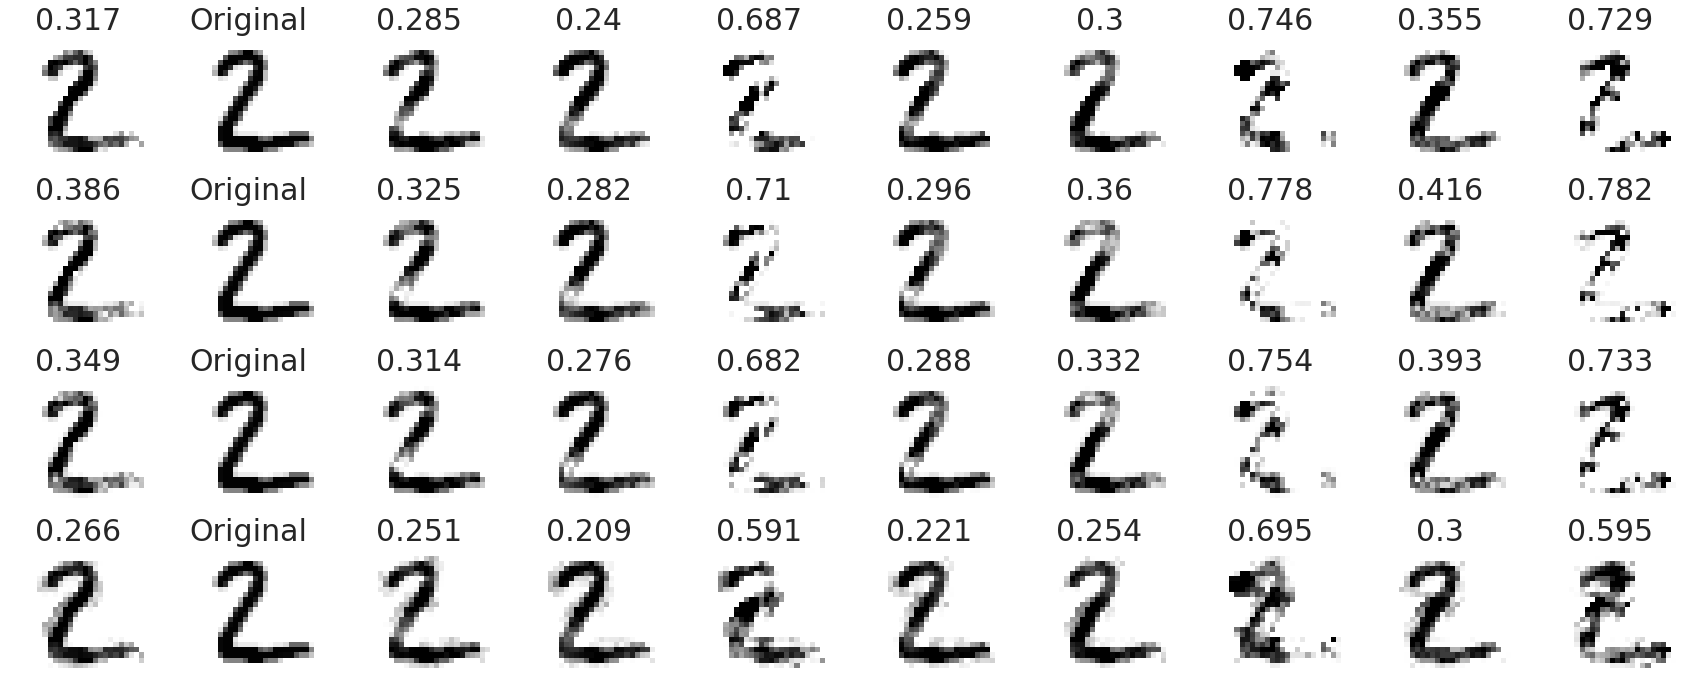

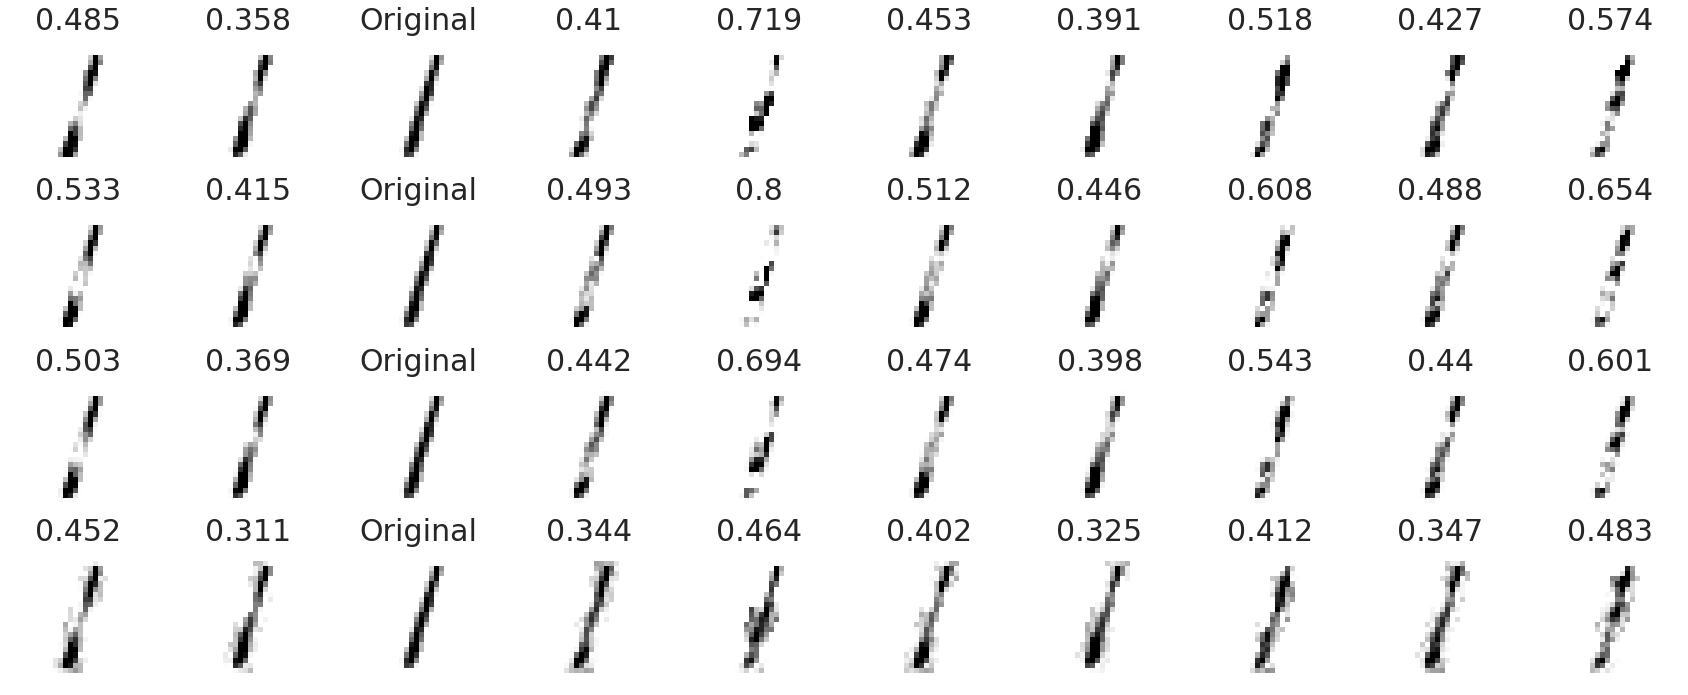

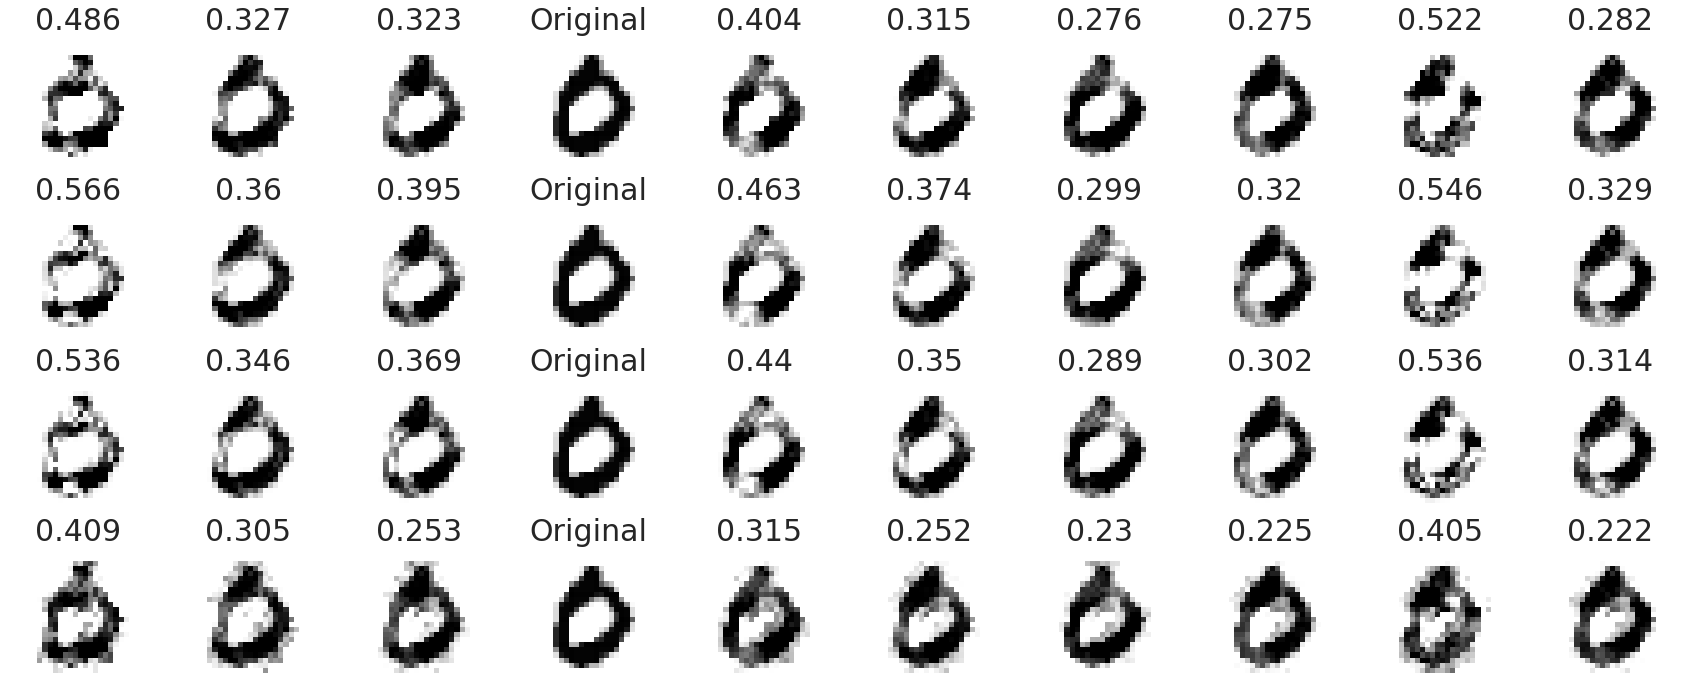

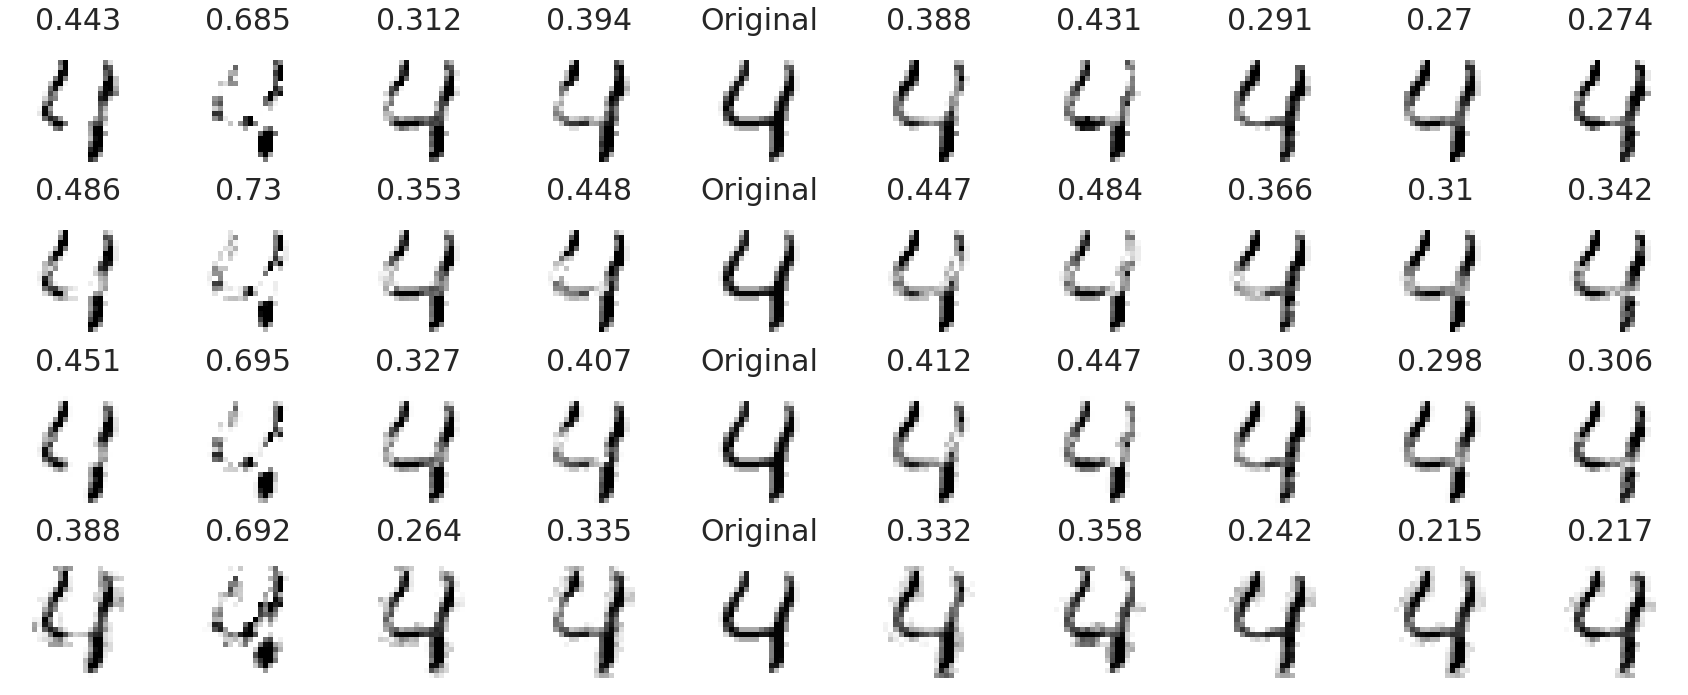

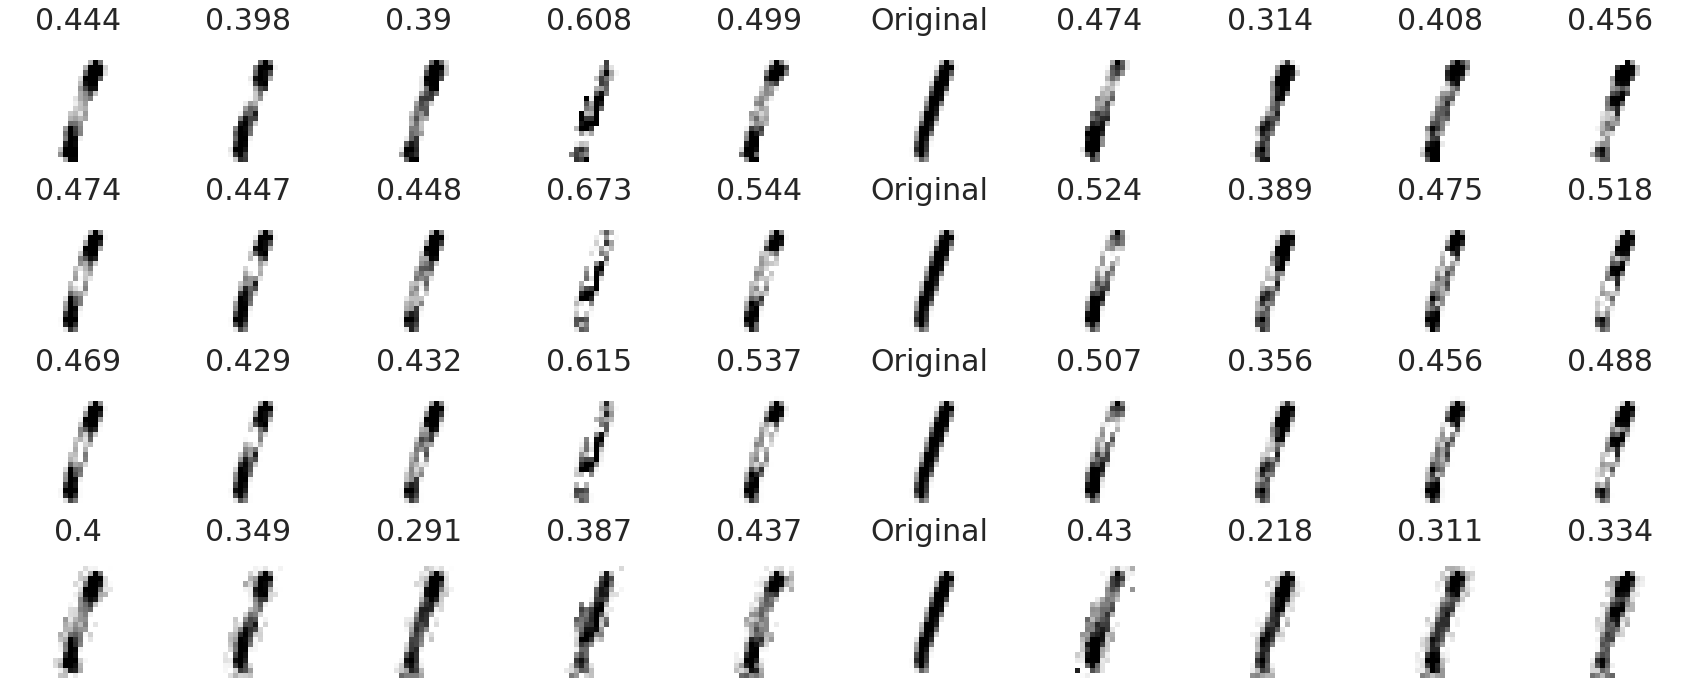

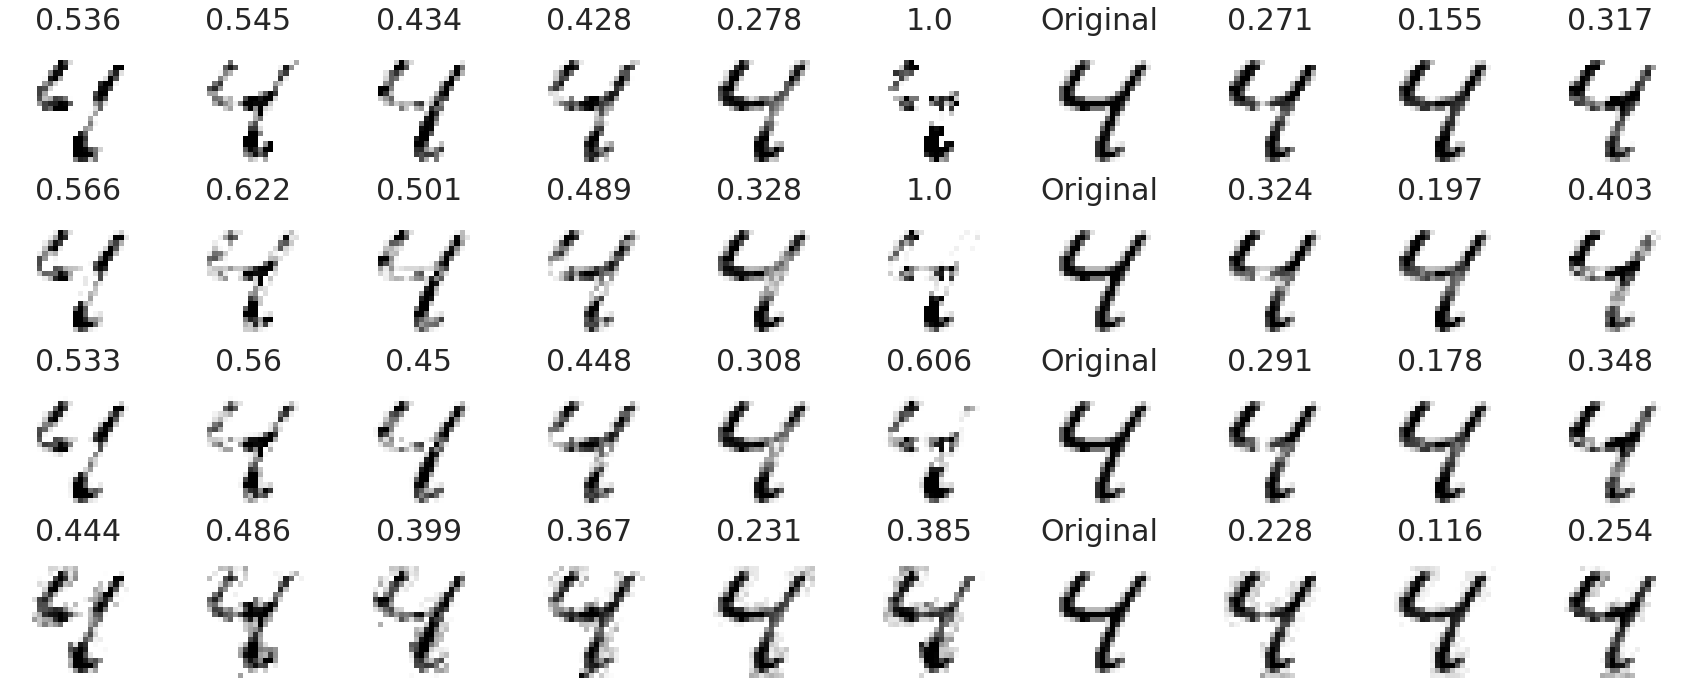

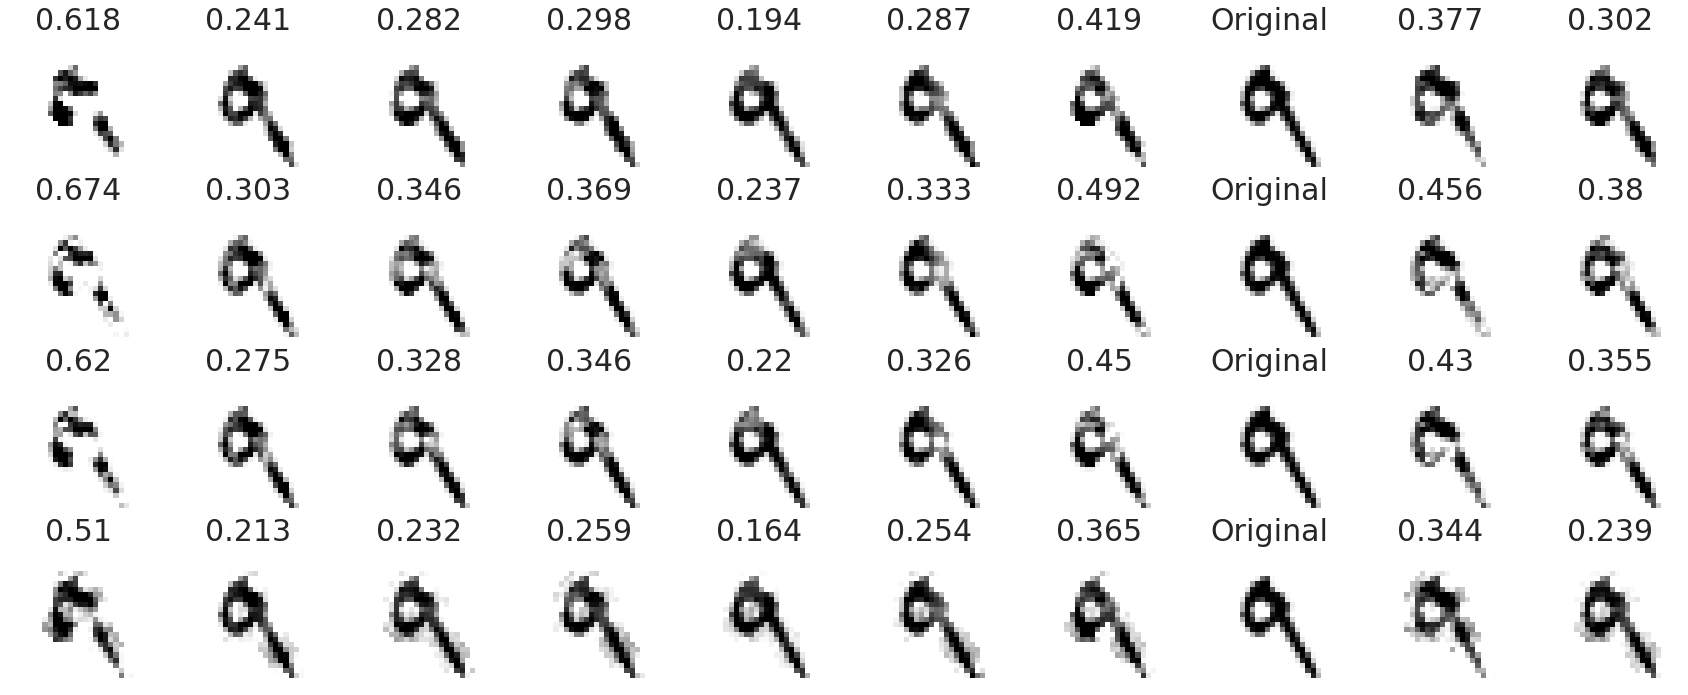

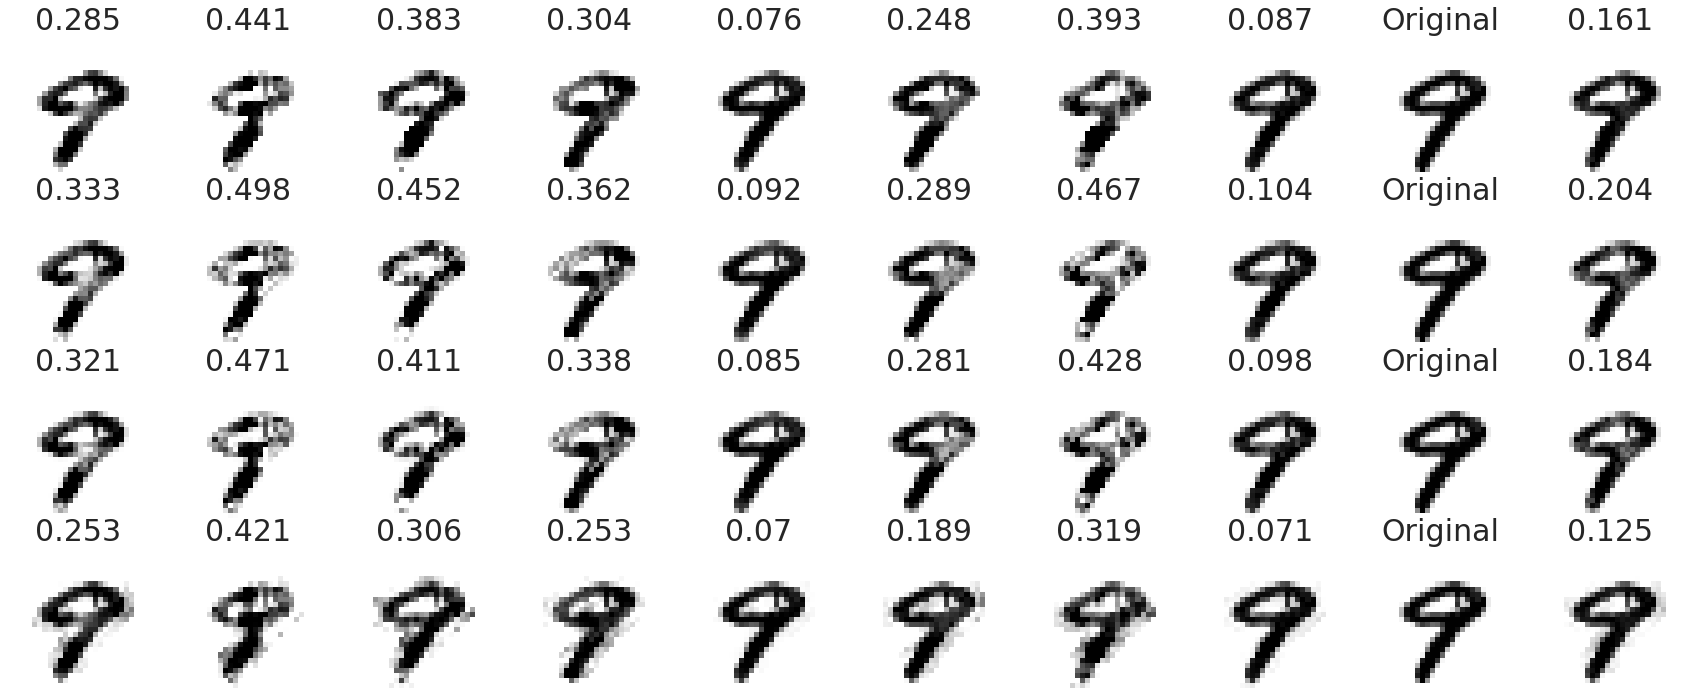

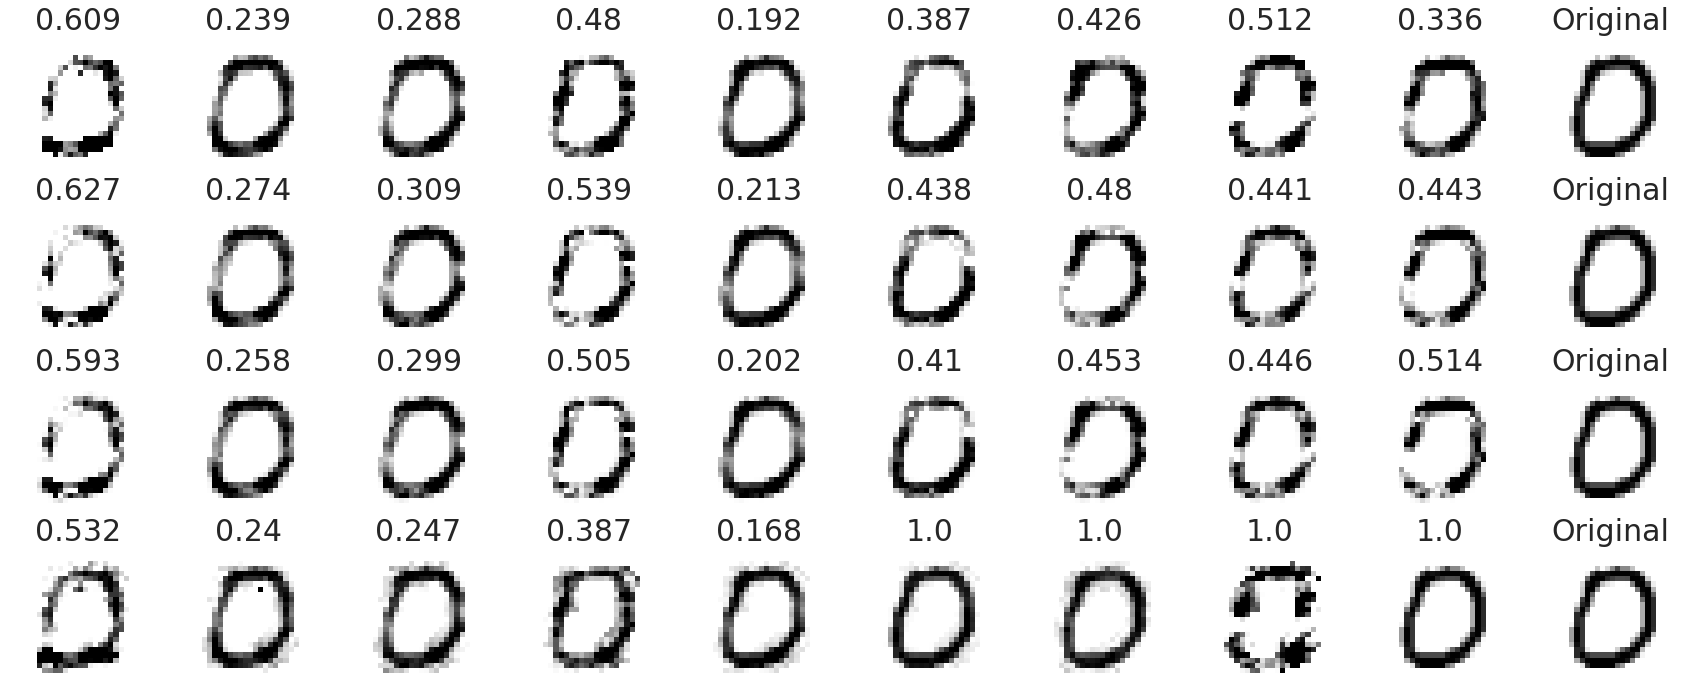

In [11]:
names = ['alg4Specific10Net1','alg5Specific10Net1Analytic', 'alg6Specific10Net1Analytic', 'alg7Specific10Net1Analytic']
imglists = np.array([np.load('../resultsNumpy/{}_imgs.npy'.format(name)) for name in names])
epssLists = np.array([np.load('../resultsNumpy/{}_epss.npy'.format(name)) for name in names])
indices = [0,1,2,3,4,5,6,7,8,9]
originals = np.load('../resultsNumpy/original100_imgs.npy')
for i in range(10):
    analyse.fullComparisonImages(originals,imglists, epssLists, indices[i], i, 'Algs567ImageComparisonFull{}'.format(i))